# This is EDA for house price in a russian city Reutov (at Moscow region)

Import libraries

In [81]:
import matplotlib.pyplot as plt
import pandas.io.sql as pds
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy.stats import binom
%matplotlib inline
print('Libraries are imported')

Libraries are imported


Filepath to the dataset I use and import

'Data has bee take from mydata.biz website'

In [8]:
file='City_Reutov.csv'

In [14]:
data = pd.read_csv(file,sep=';')
data.head()

,id,RegionEn,CityEn,AddressEn,MinPricePerSqMeter,AvgPricePerSqMeter,MaxPricePerSqMeter,OffersCount,TotalFloors,WktPoint,Lat,Lon,OnDate,Source
0,142704,Moscow oblast,Reutov,"Moscow oblast, Balashikha, micro-district of S...","116000,0000","116000,0000","116000,0000",1,14,POINT(37.892044 55.752146),55.752146,37.892044,01.10.2016 0:00:00,myData.biz
1,163038,Moscow oblast,Reutov,"Moscow oblast, Balashikha, micro-district of S...","133000,0000","133000,0000","133000,0000",2,25,POINT(37.897056 55.752683),55.752683,37.897056,01.10.2016 0:00:00,myData.biz
2,237779,Moscow oblast,Reutov,"Moscow region, Podolsk urban district, the vil...","89000,0000","89000,0000","89000,0000",1,17,POINT(37.538377 55.387024),55.387024,37.538377,01.02.2017 0:00:00,myData.biz
3,142707,Moscow oblast,Reutov,"Moscow region, Reutov, 6A neighborhood, K2","80000,0000","88000,0000","99000,0000",17,25,POINT(37.848987 55.773768),55.773768,37.848987,01.12.2016 0:00:00,myData.biz
4,142825,Moscow oblast,Reutov,"Moscow region, Reutov, 6A neighborhood, K3","74000,0000","81000,0000","85000,0000",20,25,POINT(37.848655 55.775115),55.775115,37.848655,01.12.2016 0:00:00,myData.biz


Drop some unnecessary columns and reduce the concentent of cells in column 'AdressEn'

In [12]:
data['CityEn'].unique()

array(['Reutov'], dtype=object)

In [15]:
data=data.drop(['RegionEn','CityEn','WktPoint'],axis=1)
data.head()

,id,AddressEn,MinPricePerSqMeter,AvgPricePerSqMeter,MaxPricePerSqMeter,OffersCount,TotalFloors,Lat,Lon,OnDate,Source
0,142704,"Moscow oblast, Balashikha, micro-district of S...","116000,0000","116000,0000","116000,0000",1,14,55.752146,37.892044,01.10.2016 0:00:00,myData.biz
1,163038,"Moscow oblast, Balashikha, micro-district of S...","133000,0000","133000,0000","133000,0000",2,25,55.752683,37.897056,01.10.2016 0:00:00,myData.biz
2,237779,"Moscow region, Podolsk urban district, the vil...","89000,0000","89000,0000","89000,0000",1,17,55.387024,37.538377,01.02.2017 0:00:00,myData.biz
3,142707,"Moscow region, Reutov, 6A neighborhood, K2","80000,0000","88000,0000","99000,0000",17,25,55.773768,37.848987,01.12.2016 0:00:00,myData.biz
4,142825,"Moscow region, Reutov, 6A neighborhood, K3","74000,0000","81000,0000","85000,0000",20,25,55.775115,37.848655,01.12.2016 0:00:00,myData.biz


In [18]:
data['AddressEn']=data['AddressEn'].apply(lambda r: r.replace('Moscow oblast,', ''))
data['AddressEn']=data['AddressEn'].apply(lambda r: r.replace('Moscow region,', ''))

In [19]:
data.head()

,id,AddressEn,MinPricePerSqMeter,AvgPricePerSqMeter,MaxPricePerSqMeter,OffersCount,TotalFloors,Lat,Lon,OnDate,Source
0,142704,"Balashikha, micro-district of Saltykovka, nos...","116000,0000","116000,0000","116000,0000",1,14,55.752146,37.892044,01.10.2016 0:00:00,myData.biz
1,163038,"Balashikha, micro-district of Saltykovka, nos...","133000,0000","133000,0000","133000,0000",2,25,55.752683,37.897056,01.10.2016 0:00:00,myData.biz
2,237779,"Podolsk urban district, the village Train, 26","89000,0000","89000,0000","89000,0000",1,17,55.387024,37.538377,01.02.2017 0:00:00,myData.biz
3,142707,"Reutov, 6A neighborhood, K2","80000,0000","88000,0000","99000,0000",17,25,55.773768,37.848987,01.12.2016 0:00:00,myData.biz
4,142825,"Reutov, 6A neighborhood, K3","74000,0000","81000,0000","85000,0000",20,25,55.775115,37.848655,01.12.2016 0:00:00,myData.biz


Change address by leaving only neighboorhood in the cell

In [21]:
data['AddressEn']=data['AddressEn'].apply(lambda r: str(r.split(',')[0])+','+str(r.split(',')[1]))

In [25]:
data.rename({'AddressEn':'Neighborhood'},axis=1,inplace=True)

In [26]:
data.head()

,id,Neighborhood,MinPricePerSqMeter,AvgPricePerSqMeter,MaxPricePerSqMeter,OffersCount,TotalFloors,Lat,Lon,OnDate,Source
0,142704,"Balashikha, micro-district of Saltykovka","116000,0000","116000,0000","116000,0000",1,14,55.752146,37.892044,01.10.2016 0:00:00,myData.biz
1,163038,"Balashikha, micro-district of Saltykovka","133000,0000","133000,0000","133000,0000",2,25,55.752683,37.897056,01.10.2016 0:00:00,myData.biz
2,237779,"Podolsk urban district, the village Train","89000,0000","89000,0000","89000,0000",1,17,55.387024,37.538377,01.02.2017 0:00:00,myData.biz
3,142707,"Reutov, 6A neighborhood","80000,0000","88000,0000","99000,0000",17,25,55.773768,37.848987,01.12.2016 0:00:00,myData.biz
4,142825,"Reutov, 6A neighborhood","74000,0000","81000,0000","85000,0000",20,25,55.775115,37.848655,01.12.2016 0:00:00,myData.biz


In [27]:
data.Neighborhood.value_counts()

 Reutov, Jubilee Avenue                         49
 Reutov, Komsomolskaya street                   22
 Reutov, Sovetskaya street                      19
 Reutov, street October                         18
 Reutov, nosovihinskoe highway                  16
 Reutov, Gagarin street                         11
 Reutov, Kotovsky street                         9
 Reutov, New street                              9
 Reutov, Victory street                          9
 Reutov, Ashgabat street                         8
 Reutov, street of Lenin                         7
 Reutov, South street                            7
 Reutov, St. Gagarin                             7
 Reutov, Dzerzhinsky street                      7
 Reutov, Gagarina street                         7
 Reutov, street Gagarina                         7
 Reutov, Lenin street                            6
 Reutov, street of Kalinin                       6
 Reutov, Sovetskaya str.                         6
 Reutov, Golovashkina street   

Smaller dataframe that contains only Average prices per square meters, number of the offers and neighborhood

In [35]:
columns=['Neighborhood','AvgPricePerSqMeter','TotalFloors','OffersCount']
smaller_data=data[columns]
smaller_data['AvgPricePerSqMeter']=smaller_data['AvgPricePerSqMeter'].apply(lambda x: int(x.split(',')[0]))
smaller_data.head()

<ipython-input-35-7464ab64b49f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller_data['AvgPricePerSqMeter']=smaller_data['AvgPricePerSqMeter'].apply(lambda x: int(x.split(',')[0]))


,Neighborhood,AvgPricePerSqMeter,TotalFloors,OffersCount
0,"Balashikha, micro-district of Saltykovka",116000,14,1
1,"Balashikha, micro-district of Saltykovka",133000,25,2
2,"Podolsk urban district, the village Train",89000,17,1
3,"Reutov, 6A neighborhood",88000,25,17
4,"Reutov, 6A neighborhood",81000,25,20


In [49]:
sum(smaller_data['OffersCount'])

2488

In [51]:
smaller_data.iloc[0,:3]

Neighborhood           Balashikha, micro-district of Saltykovka
AvgPricePerSqMeter                                       116000
TotalFloors                                                  14
Name: 0, dtype: object

In [54]:
new_data=[]
for raw in range(len(smaller_data)):
    offer_count=smaller_data.loc[raw,'OffersCount']
    while offer_count>0:
        new_data.append(smaller_data.iloc[raw,:3])
        offer_count=offer_count-1
new_df=pd.DataFrame(new_data)

In [58]:
new_df.dtypes

Neighborhood          object
AvgPricePerSqMeter     int64
TotalFloors            int64
dtype: object

Describing the Data

AvgPricePerSqMeter and TotalFloors are Features

Neighborhood is Target variable

In [59]:
stats_data = new_df.describe()
stats_data.head()

,AvgPricePerSqMeter,TotalFloors
count,2488.000000,2488.000000
mean,121788.585209,19.084003
std,23661.997952,6.877042
min,74000.000000,3.000000
25%,109000.000000,14.000000


Groupby as mean on 'Neighborhood' 

If there is 'NaN', fill it with a zero

In [104]:
grouped_df=new_df.groupby('Neighborhood').agg([np.mean,np.std])
grouped_df=grouped_df.fillna(0)
grouped_df.head(7)

AvgPricePerSqMeter                \
                                                         mean           std   
Neighborhood                                                                  
 Balashikha, micro-district of Saltykovka       127333.333333   9814.954576   
 Podolsk urban district, the village Train       89000.000000      0.000000   
 Reutov, 6A neighborhood                         78982.300885   4582.541210   
 Reutov, Ashgabat street                        128645.161290  10898.160050   
 Reutov, Dzerzhinsky street                     123217.391304  12720.622204   
 Reutov, Forest street                          146000.000000   6928.203230   
 Reutov, Gagarin street                         125294.117647  12662.350329   

                                           TotalFloors            
                                                  mean       std  
Neighborhood                                                      
 Balashikha, micro-district of Saltykovka    21.333333  6.350853  
 Podolsk urban district, the village Train   17.000000  0.000000  
 Reutov, 6A neighborhood                     25.000000  0.000000  
 Reutov, Ashgabat street                     15.387097  6.064528  
 Reutov, Dzerzhinsky street                  15.304348  2.898821  
 Reutov, Forest street                       23.666667  4.618802  
 Reutov, Gagarin street                      13.000000  7.336088

In [102]:
grouped_df=grouped_df.reset_index()
grouped_df['Neighborhood'].unique()

array([' Balashikha, micro-district of Saltykovka',
       ' Podolsk urban district, the village Train',
       ' Reutov, 6A neighborhood', ' Reutov, Ashgabat street',
       ' Reutov, Dzerzhinsky street', ' Reutov, Forest street',
       ' Reutov, Gagarin street', ' Reutov, Gagarina street',
       ' Reutov, Garden travel', ' Reutov, Golovashkina street',
       ' Reutov, Golovashkina ulitsa', ' Reutov, Jubilee Avenue',
       ' Reutov, Komsomolskaya street',
       ' Reutov, Komsomolskaya street 32', ' Reutov, Kotovsky street',
       ' Reutov, Lenin street', ' Reutov, Lesnaya street',
       ' Reutov, Lesnaya street 11', ' Reutov, Mira',
       ' Reutov, Mira Avenue', " Reutov, Nekrasov's street",
       ' Reutov, New street', ' Reutov, Park street',
       ' Reutov, Pobedy street', ' Reutov, Reutov',
       ' Reutov, South street', ' Reutov, Sovetskaya str.',
       ' Reutov, Sovetskaya street', ' Reutov, Sovetskaya ulitsa',
       ' Reutov, St. Gagarin', ' Reutov, Victory street',

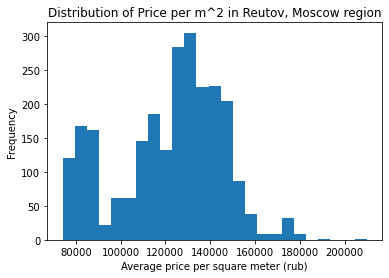

In [125]:
ax = plt.axes()
ax.hist(new_df['AvgPricePerSqMeter'], bins=25);

ax.set(xlabel='Average price per square meter (rub)', 
       ylabel='Frequency',
       title='Distribution of Price per m^2 in Reutov, Moscow region');
plt.savefig('Histogram_reutov.jpg')

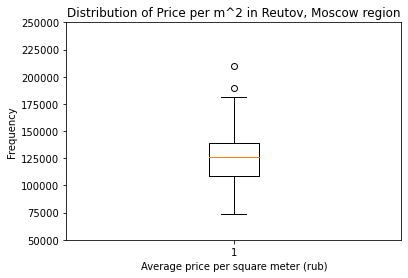

In [127]:
ax = plt.axes()
ax.boxplot(new_df['AvgPricePerSqMeter']);
ax.set_ylim([50000,250000])
ax.set(xlabel='Average price per square meter (rub)', 
       ylabel='Frequency',
       title='Distribution of Price per m^2 in Reutov, Moscow region')
plt.savefig('Boxplot_reutov.jpg')

There are two outliers in the data (price/m^2 above 185,000 rub)

In [88]:
new_df[new_df['AvgPricePerSqMeter']>185000]

,Neighborhood,AvgPricePerSqMeter,TotalFloors
111,"Reutov, Komsomolskaya street",190000,5
267,"Reutov, street of Kalinin",210000,5


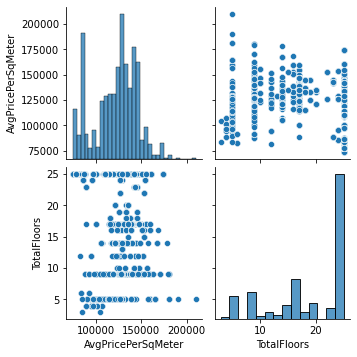

In [128]:
sns.pairplot(new_df);
plt.savefig('Pairplot_reutov.jpg')

It's clear that there is no correlation between the AvgPricePerSqMeter and Number of floors

# Now I will make hypotheses

1) Null: Average price per m^2 in a house of more than 10 floors is above 100,000 rub

Alternative: The aforementioned is not correct

2) Null: IF price is 83,500 rub it is not a price for an appartment in 'Reutov,Gagarin Street'

Alternative: The aforementioned is not correct

3) Null: IF number of floors is 25, the price for an appartment is below 170,000 rub

Alternative: The aforementioned is not correct

__I will check hypothesis 2__

In [110]:
gagarin_df=new_df[new_df['Neighborhood']==' Reutov, Gagarina street']
gagarin_df

,Neighborhood,AvgPricePerSqMeter,TotalFloors
36,"Reutov, Gagarina street",114000,9
36,"Reutov, Gagarina street",114000,9
36,"Reutov, Gagarina street",114000,9
36,"Reutov, Gagarina street",114000,9
36,"Reutov, Gagarina street",114000,9
37,"Reutov, Gagarina street",88000,9
37,"Reutov, Gagarina street",88000,9
38,"Reutov, Gagarina street",84000,25
38,"Reutov, Gagarina street",84000,25
38,"Reutov, Gagarina street",84000,25


In [121]:
prob1=1-len(gagarin_df[gagarin_df['AvgPricePerSqMeter']>83000])/len(gagarin_df)
print('Probability that appartment of price 83000 per m^2\n is located at Reutov, Gagatina street = {}%'.format(prob1*100))

Probability that appartment of price 83000 per m^2
 is located at Reutov, Gagatina street = 6.25%


In [122]:
prob2=1-len(new_df[new_df['AvgPricePerSqMeter']>83000])/len(new_df)
print('Probability that appartment of price 83000 per m^2\n is located at Reutov = {}%'.format(prob2*100))

Probability that appartment of price 83000 per m^2
 is located at Reutov = 5.9887459807073995%
